**Laboratorio de Métodos Cuantitativos Aplicados a la Gestión**

---
Clase 2 - Manipulación de datos organizacionales y visualización


⏩ Vamos a utilizar lo que conocemos sobre matrices para armar tablas de datos organizacionales y trabajar con ellas

---
Una matriz es un arreglo rectangular de números con n filas × m columnas.

🌐 **En la práctica organizacional:**  
Cada fila representa un elemento (ej: planta, producto) y cada columna un atributo (ej: ventas, costos).


✅ Paso 1

---

Importamos librerías que vamos a utilizar

In [1]:
#Importamos las librerías que vamos a utilizar
import numpy as np #para hacer operaciones matemáticas
import pandas as pd #para manejo de archivos de datos
import matplotlib.pyplot as plt #para hacer gráficos
import seaborn as sns #para hacer gráficos

✅ Paso 2

---

Construímos tablas de datos organizacionales

In [2]:
# Armamos una matriz que contenga datos de producción (en unidades)

matriz_produccion = np.array([
    [150, 200, 100],  # Planta Norte
    [180, 150, 120],  # Planta Centro
    [90, 110, 130]    # Planta Sur
])
print(matriz_produccion)

[[150 200 100]
 [180 150 120]
 [ 90 110 130]]


In [3]:
# Ahora la convertimos en una tabla de datos con las etiquetas correspondientes

data_produccion = pd.DataFrame(
    matriz_produccion,
    index=["Planta Norte", "Planta Centro", "Planta Sur"],
    columns=["Producto A", "Producto B", "Producto C"]
)

#la visualizamos
data_produccion

,Producto A,Producto B,Producto C
Planta Norte,150,200,100
Planta Centro,180,150,120
Planta Sur,90,110,130


✅ Paso 3

---
Realizamos operaciones básicas con la tabla de datos


In [4]:
# Agregamos una columna de producción total por planta
data_produccion["Total Unidades"] = data_produccion.sum(axis=1)
data_produccion

,Producto A,Producto B,Producto C,Total Unidades
Planta Norte,150,200,100,450
Planta Centro,180,150,120,450
Planta Sur,90,110,130,330


In [5]:
#Armamos una tabla que contenga los porcentajes de contribución de cada producto
data_porcentaje = data_produccion.div(data_produccion["Total Unidades"], axis=0) * 100
data_porcentaje

,Producto A,Producto B,Producto C,Total Unidades
Planta Norte,33.333333,44.444444,22.222222,100.0
Planta Centro,40.000000,33.333333,26.666667,100.0
Planta Sur,27.272727,33.333333,39.393939,100.0


In [6]:
# Calculamos los totales por producto
total_producto_A = data_produccion["Producto A"].sum()
total_producto_B = data_produccion["Producto B"].sum()
total_producto_C = data_produccion["Producto C"].sum()

print("Totales por Producto:")
print("Producto A:", total_producto_A)
print("Producto B:", total_producto_B)
print("Producto C:", total_producto_C)
print("Total Unidades:", data_produccion["Total Unidades"].sum())


Totales por Producto:
Producto A: 420
Producto B: 460
Producto C: 350
Total Unidades: 1230


✅ Paso 4

---
Hacemos algunos gráficos para visualizar datos de la tabla


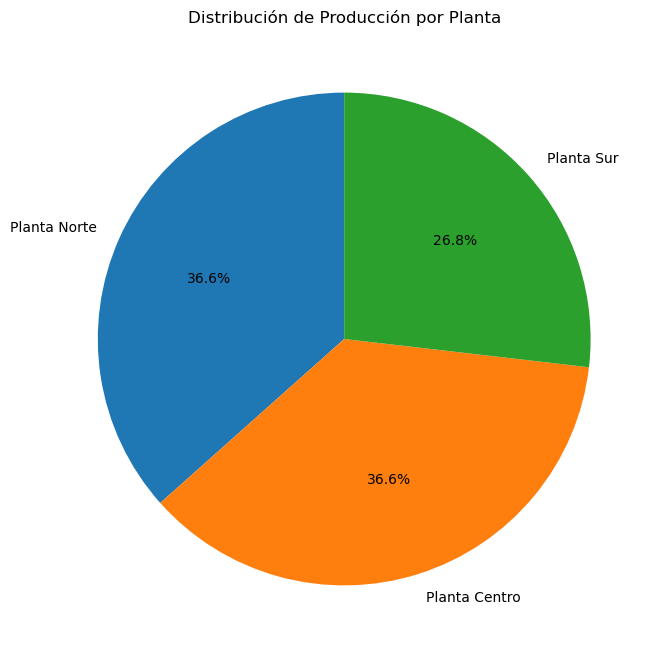

In [7]:
#Gráfico 1 - Visualizamos como se distribuye porcentualmente la producción respecto de cada  de cada planta
#Para esto hacemos un gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(data_produccion["Total Unidades"], labels=data_produccion.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribución de Producción por Planta")
plt.show()

Text(0, 0.5, 'Cantidad de Unidades')

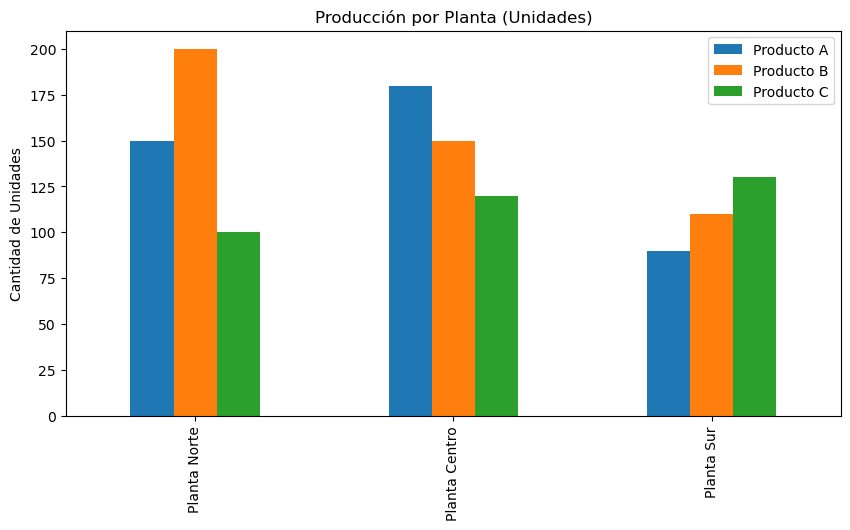

In [8]:
#Gráfico 2:Visualizamos la cantidad en unidades de producción de cada producto en cada planta
#Para esto hacemos un gráfico de barras
plt.figure(figsize=(10, 5))
data_produccion.loc[:, ["Producto A","Producto B","Producto C"]].plot(kind='bar', ax=plt.gca())
plt.title("Producción por Planta (Unidades)")
plt.ylabel("Cantidad de Unidades")

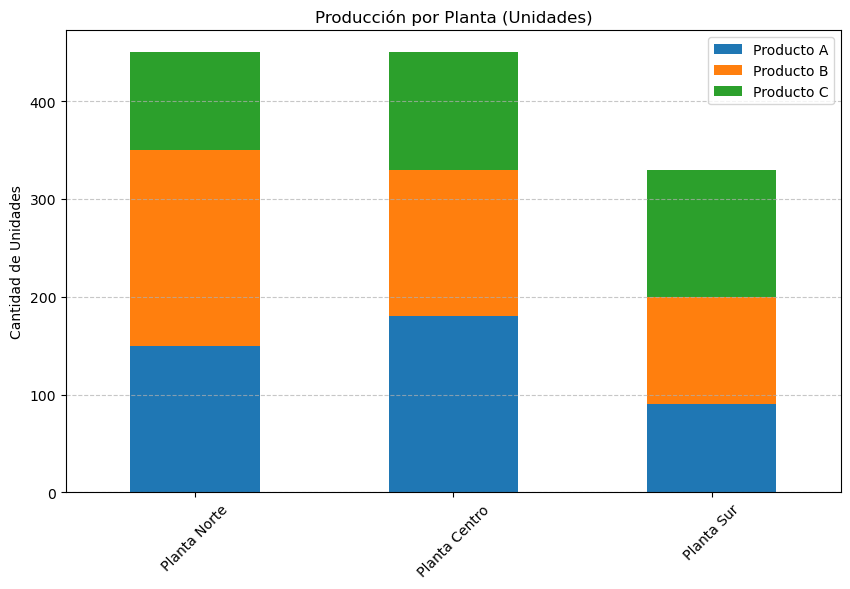

In [9]:
# Gráfico 3: Visualizamos la producción por planta, destacando la cantidad por producto
#Para esto hacemos un gráfico de barras apiladas
plt.figure(figsize=(10, 6))
data_produccion.loc[:, ["Producto A","Producto B","Producto C"]].plot(kind='bar', stacked=True, ax=plt.gca())
plt.title("Producción por Planta (Unidades)")
plt.ylabel("Cantidad de Unidades")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)


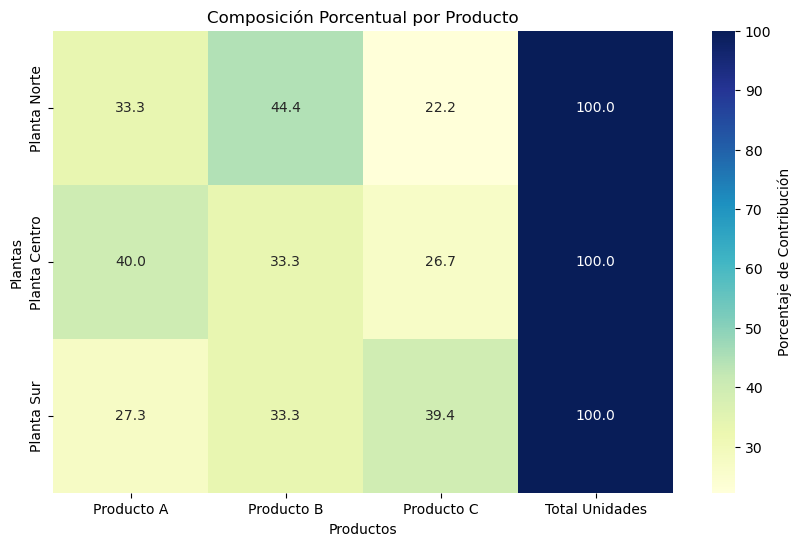

In [10]:
# Gráfico 4: Visualizamos la composición porcentual de cada producto en cada planta
# Para esto hacemos un mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(data_porcentaje, annot=True, fmt=".1f", cmap="YlGnBu",
            cbar_kws={'label': 'Porcentaje de Contribución'})
plt.title("Composición Porcentual por Producto")
plt.xlabel("Productos")
plt.ylabel("Plantas")


plt.show()

⏩ Vamos a analizar las ventas de una empresa

---



✅ Paso 1

---

Armamos una matriz con las ventas trimestrales de una empresa que ofrece 3 productos.

Como en el año tenemos 4 trimestres, y vendemos 3 productos, haremos una matriz de 4 x 3 ( las filas representan las ventas por trimestres y las columnas corresponden a las cantidades vendidas de cada producto)

Luego convertimos la matriz en una tabla de datos.

In [11]:
# Cargamos las cantidades trimestrales por producto vendidas(en unidades) en una matriz de ventas trimestrales (matriz 4x3)
matriz_ventas = np.array([
    [120, 85, 150],   # T1-Trimestre 1
    [95, 73, 130],    # T2-Trimestre 2
    [110, 90, 145],   # T3-Trimestre 3
    [105, 80, 120]    # T4-Trimestre 4
])
print(matriz_ventas)

[[120  85 150]
 [ 95  73 130]
 [110  90 145]
 [105  80 120]]


In [12]:
# Creamos la tabla de datos a partir de la matriz
datos_ventas = pd.DataFrame(
    matriz_ventas,
    index=["T1", "T2", "T3", "T4"],
    columns=["Producto X", "Producto Y", "Producto Z"]
)
datos_ventas

,Producto X,Producto Y,Producto Z
T1,120,85,150
T2,95,73,130
T3,110,90,145
T4,105,80,120


✅ Paso 2

---

Armamos los vectores de precios unitarios por trimestre para calcular los ingresos por ventas trimestrales.

Luego añadimos la información a la tabla de datos.

In [13]:
#Generamos los vectores columna de precios, uno para cada trimestre
vector_precios_trimestre_1 = np.array([[45], [75],[30]])
vector_precios_trimestre_2 = np.array([[50], [79], [35]])
vector_precios_trimestre_3 = np.array([[55], [82],[41]])
vector_precios_trimestre_4 = np.array([[60], [88], [54]])


In [14]:
#Conformamos un matriz de precios a partir de los vectores
matriz_precios_por_trimestre = np.concatenate((vector_precios_trimestre_1,
                                               vector_precios_trimestre_2,
                                               vector_precios_trimestre_3,
                                               vector_precios_trimestre_4), axis=1)
matriz_precios_por_trimestre

array([[45, 50, 55, 60],
       [75, 79, 82, 88],
       [30, 35, 41, 54]])

In [15]:
#Ahora trasponemos la matriz y la convertimos en una tabla de datos
tabla_precios=pd.DataFrame(matriz_precios_por_trimestre.T, index=["T1", "T2", "T3", "T4"], columns=["Precios X", "Precios Y", "Precios Z"])
tabla_precios

,Precios X,Precios Y,Precios Z
T1,45,75,30
T2,50,79,35
T3,55,82,41
T4,60,88,54


In [16]:
#Unimos ambas tablas de datos para constituir una sola con toda la información
datos_ventas=pd.concat([datos_ventas, tabla_precios], axis=1)
datos_ventas

,Producto X,Producto Y,Producto Z,Precios X,Precios Y,Precios Z
T1,120,85,150,45,75,30
T2,95,73,130,50,79,35
T3,110,90,145,55,82,41
T4,105,80,120,60,88,54


In [17]:
#Agregamos un columna para registrar el total de ingresos por trimestre
datos_ventas["Total Ingresos"]=datos_ventas['Producto X']*datos_ventas['Precios X']+datos_ventas['Producto Y']*datos_ventas['Precios Y']+datos_ventas['Producto Z']*datos_ventas['Precios Z']
datos_ventas

,Producto X,Producto Y,Producto Z,Precios X,Precios Y,Precios Z,Total Ingresos
T1,120,85,150,45,75,30,16275
T2,95,73,130,50,79,35,15067
T3,110,90,145,55,82,41,19375
T4,105,80,120,60,88,54,19820


✅ Paso 3

---
Hacemos algunos gráficos para visualizar datos de la tabla


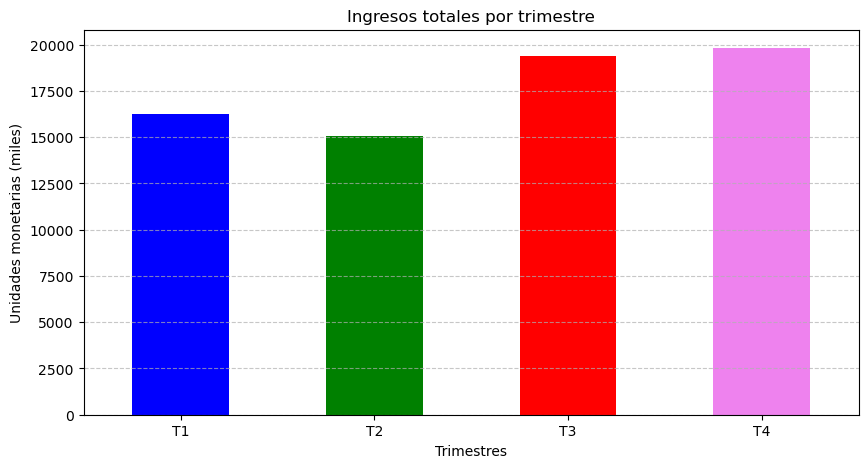

In [18]:
# Vamos a graficar los ingresos totales por trimestre
# Para eso hacemos un gráfico de barras
datos = datos_ventas['Total Ingresos']

plt.figure(figsize=(10, 5))#establecemos el tamaño del gráfico
datos.plot(kind='bar', color=['blue', 'green', 'red','violet'])#ploteamos un gráfico de barras
plt.title('Ingresos totales por trimestre')#Le agregamos un título
plt.xlabel('Trimestres')#agregamos la etiqueta del eje x
plt.ylabel('Unidades monetarias (miles)')#agregamos la etiqueta de eje y
plt.xticks(rotation=0)  # Para que los nombres queden horizontales
plt.grid(axis='y', linestyle='--', alpha=0.7)#agregamos las líneas grises marcadoras
plt.show()#pedimos ver el gráfico

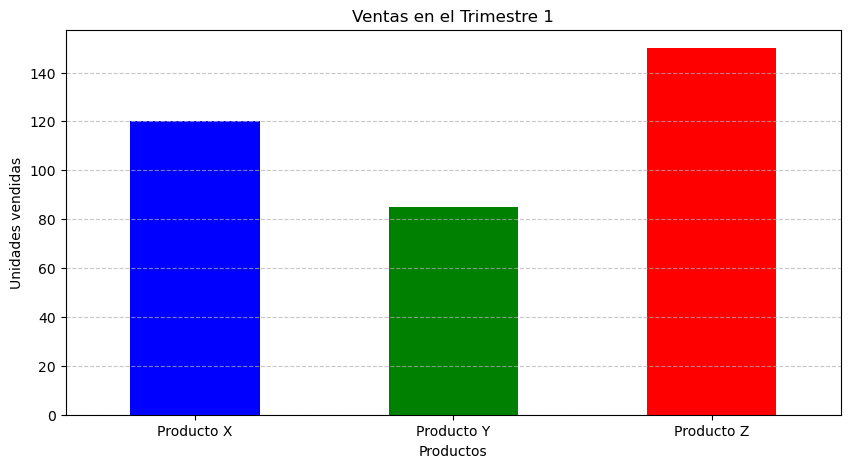

In [19]:
#Ahora vamos a graficar las unidades vendidas de cada producto para un trimestre en particular
#Para esto hacemos un gráfico de barras

# Seleccionamos un trimestre para mostrar (en este caso T1)
datos_t1 = datos_ventas.loc['T1'][['Producto X', 'Producto Y', 'Producto Z']]

plt.figure(figsize=(10, 5))
datos_t1.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Ventas en el Trimestre 1')
plt.xlabel('Productos')
plt.ylabel('Unidades vendidas')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

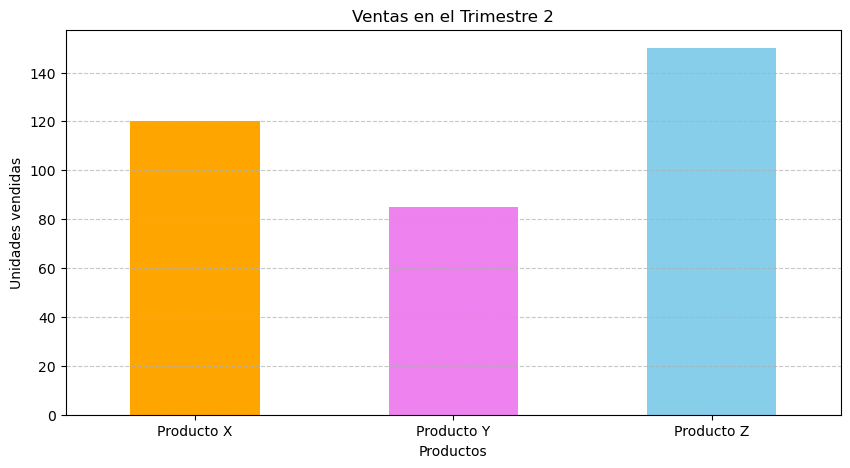

In [45]:
# Seleccionamos un trimestre para mostrar (en este caso T2)
datos_t2 = datos_ventas.loc['T2'][['Producto X', 'Producto Y', 'Producto Z']]

plt.figure(figsize=(10, 5))
datos_t1.plot(kind='bar', color=['orange', 'violet', 'skyblue'])
plt.title('Ventas en el Trimestre 2')
plt.xlabel('Productos')
plt.ylabel('Unidades vendidas')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

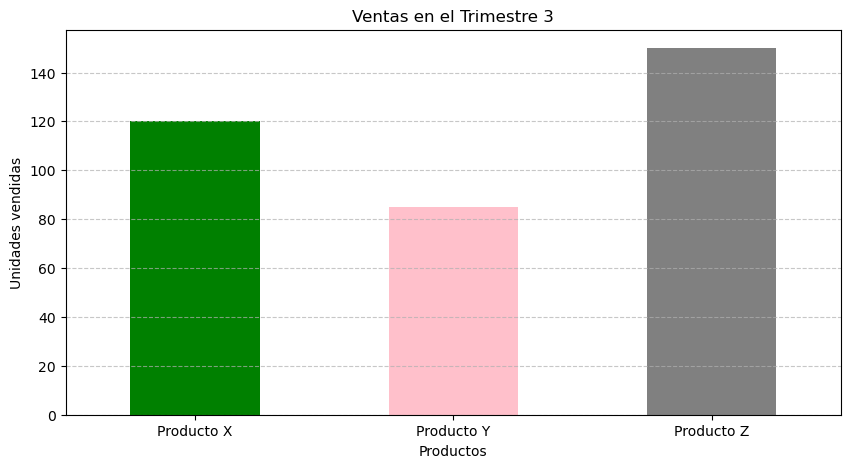

In [21]:
# Seleccionamos un trimestre para mostrar (en este caso T3)
datos_t3 = datos_ventas.loc['T3'][['Producto X', 'Producto Y', 'Producto Z']]

plt.figure(figsize=(10, 5))
datos_t1.plot(kind='bar', color=['green', 'pink', 'grey'])
plt.title('Ventas en el Trimestre 3')
plt.xlabel('Productos')
plt.ylabel('Unidades vendidas')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

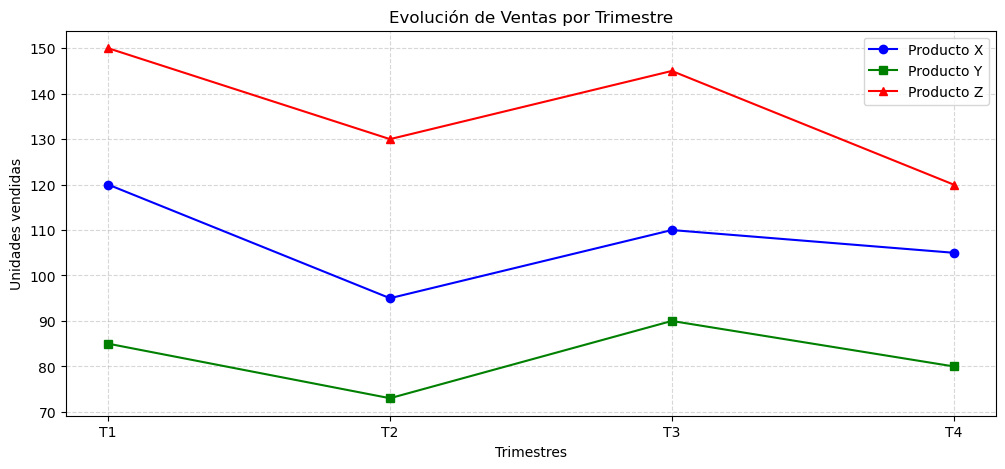

In [22]:
#Ahora vamos a graficar la evolución de las ventas por trimestre
#Para esto hacemos un gráfico de líneas
plt.figure(figsize=(12, 5))

# Graficamos cada producto por separado
plt.plot(datos_ventas.index, datos_ventas['Producto X'], 'b-o', label='Producto X')
plt.plot(datos_ventas.index, datos_ventas['Producto Y'], 'g-s', label='Producto Y')
plt.plot(datos_ventas.index, datos_ventas['Producto Z'], 'r-^', label='Producto Z')

plt.title('Evolución de Ventas por Trimestre')
plt.xlabel('Trimestres')
plt.ylabel('Unidades vendidas')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

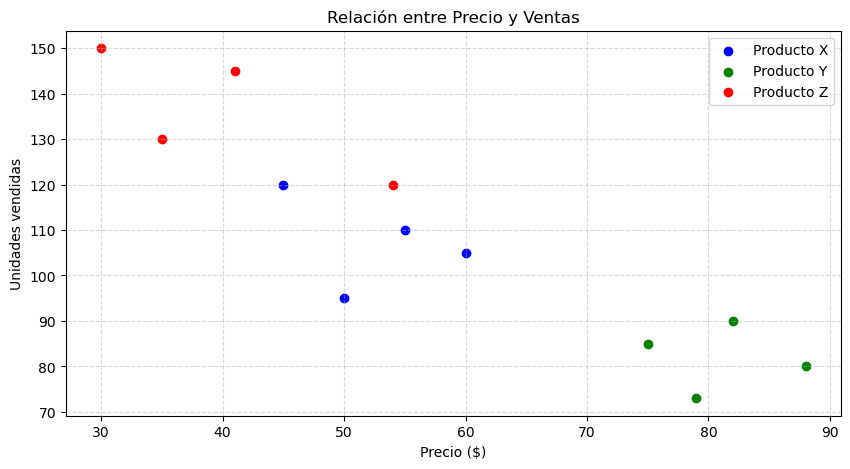

In [23]:
#Vamos a hacer un diagrama de dispersión que muestre los precios en el eje x, cantidades vendidas en eje y
#Buscamos ver la relación entre precios y ventas para cada producto
plt.figure(figsize=(10, 5))

plt.scatter(datos_ventas['Precios X'], datos_ventas['Producto X'], color='blue', label='Producto X')
plt.scatter(datos_ventas['Precios Y'], datos_ventas['Producto Y'], color='green', label='Producto Y')
plt.scatter(datos_ventas['Precios Z'], datos_ventas['Producto Z'], color='red', label='Producto Z')

plt.title('Relación entre Precio y Ventas')
plt.xlabel('Precio ($)')
plt.ylabel('Unidades vendidas')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

✋ Ahora tenemos un desafío!!!

---
Vamos a traer una base de datos desde la web y realizar distintos tipos de gráficos ✨


✅ Paso 1

---

Lo primero que debe hacerse es importar las librerías que vamos a usar, pero en este caso ya lo hicimos al principio de la clase con estas sentencias


```
#paso 1 importar las librerías que se van a utilizar
import pandas as pd                   #para manipular los archivos
import matplotlib.pyplot as plt       #para hacer gráficos
import seaborn as sb                  #para hacer gráficos
import numpy as np                    #para operaciones matemáticas
```

Por lo tanto, ya hicimos este paso


✅ Paso 2

---
Importamos la base de datos y la visualizamos


In [24]:
#Cargamos un conjunto de datos
#Em este caso lo importamos desde la web
url = 'https://raw.githubusercontent.com/selva86/datasets/master/Carseats.csv'
#le pedimos a pandas que lo lea y le asignamos un nombre para crear el dataframe
datos = pd.read_csv(url)
datos

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


✨✨Vemos que es como una gran matriz!!!!✨✨


La base se llama Carseats y contiene datos simulados sobre las ventas de asientos para niños en 400 tiendas diferentes. Esta tabla de datos incluye en sus columnas las siguientes variables:

Sales: Ventas unitarias (en miles) en cada ubicación.

CompPrice: Precio cobrado por el competidor en cada ubicación.

Income: Nivel de ingresos de la comunidad (en miles de dólares).

Advertising: Presupuesto de publicidad local para la empresa en cada ubicación (en miles de dólares).

Population: Tamaño de la población en la región (en miles).

Price: Precio que la empresa cobra por los asientos para niños en cada sitio.

ShelveLoc: Calidad de la ubicación en los estantes para los asientos (con niveles: Malo, Bueno y Medio).

Age: Edad promedio de la población local.

Education: Nivel educativo en cada ubicación.

Urban: Indicador de si la tienda está en una zona urbana o rural.

US: Indicador de si la tienda está en los EE. UU. o no.

✅ Paso 3

---
Realizamos diferentes gráficos para visualizar información a partir de los datos


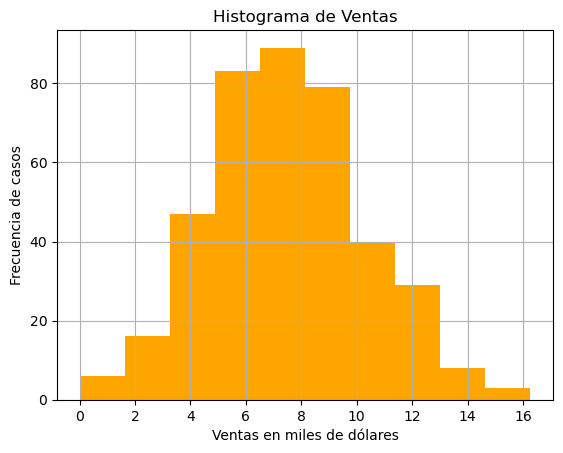

In [25]:
#Inspeccionamos como fueron las ventas para estas tiendas
#Lo hacemos a traves de un Histograma que nos muestra la distribución de las mismas
datos.hist("Sales",color="orange")
plt.xlabel("Ventas en miles de dólares")
plt.ylabel("Frecuencia de casos")
plt.title("Histograma de Ventas")
plt.show()

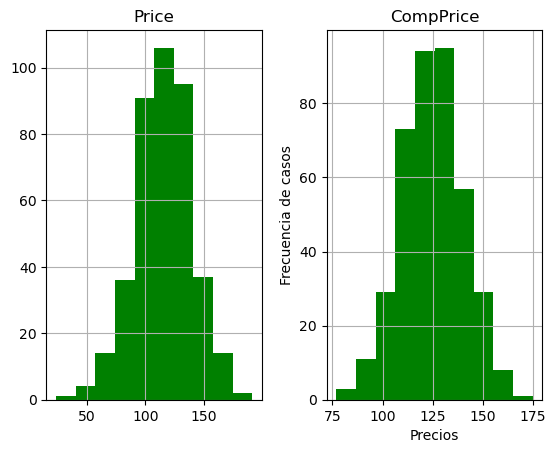

In [26]:
#Inspeccionamos los precios de venta de las tiendas y de sis competidores
#Lo hacemos a traves de un Histograma que nos muestra la distribución de ambos
datos.hist(["Price","CompPrice"],color="green")
plt.xlabel("Precios")
plt.ylabel("Frecuencia de casos")

plt.show()

In [27]:
# from google.colab import drive
# drive.mount('/content/drive')

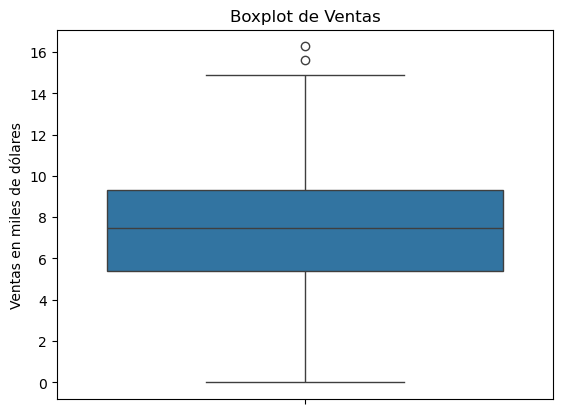

In [28]:
#otra forma de ver como fueron las ventas para estas tiendas
#Lo hacemos a traves de un Boxplot que nos muestra la distribución de las mismas
sns.boxplot(data=datos["Sales"])
plt.ticklabel_format(style="plain",axis="y")
plt.ylabel("Ventas en miles de dólares")
plt.title("Boxplot de Ventas")
plt.show()

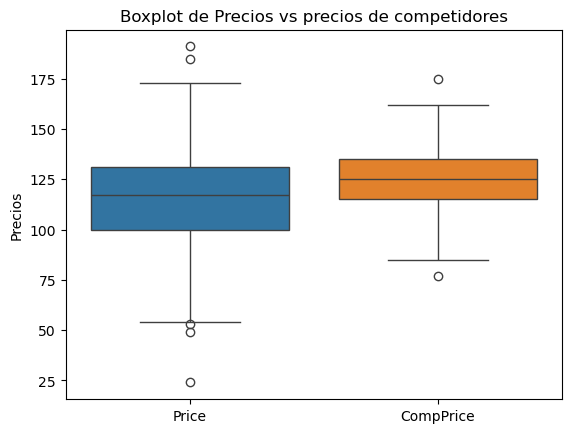

In [29]:
#Otra forma de ver los precios de venta de las tiendas y de sis competidores
#Lo hacemos a traves de un Boxplot que nos muestra la distribución de ambos
sns.boxplot(data=datos[["Price","CompPrice"]])
plt.ticklabel_format(style="plain",axis="y")
plt.ylabel("Precios")
plt.title("Boxplot de Precios vs precios de competidores")
plt.show()

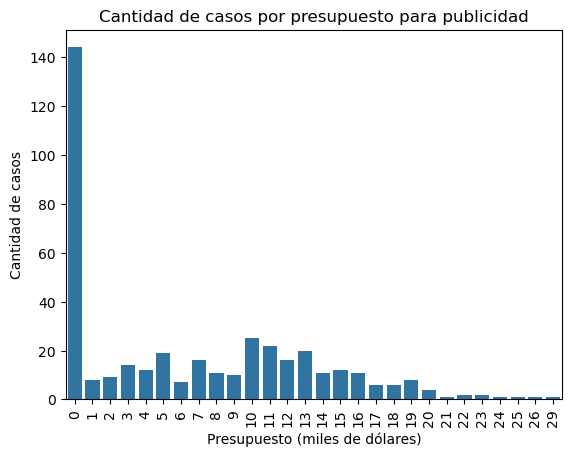

In [30]:
#Visualizamos la cantidad de tiendas segun su presupuesto en publicidad
#realizamos el gráfico de barras con seaborn
sns.countplot(x="Advertising",data=datos)
plt.xticks(rotation=90)
plt.xlabel("Presupuesto (miles de dólares)")
plt.ylabel("Cantidad de casos")
plt.title("Cantidad de casos por presupuesto para publicidad")
plt.show()

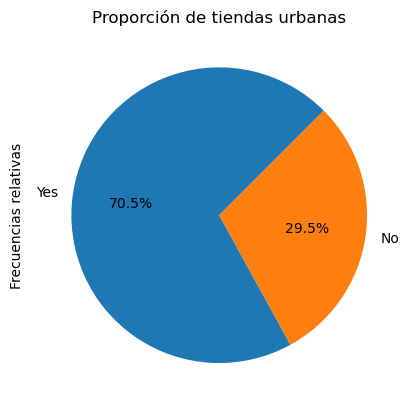

In [31]:
#Visualizamos que porcentaje de tiendas se ubica en zonas urbanas y cual en zonas no urbanas
#Hacemos un gráfico de torta para ver la composición porcentual
datos["Urban"].value_counts().plot.pie(startangle=45,autopct="%.1f%%",title="Proporción de tiendas urbanas")
plt.ylabel("Frecuencias relativas")
plt.show()

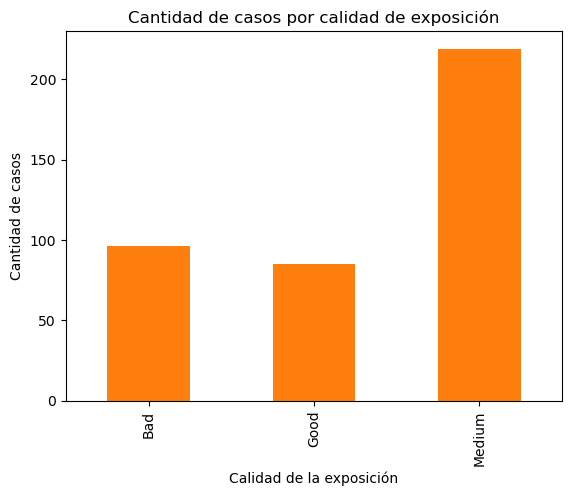

In [32]:
#Hacemos un gráfico de barras verticales para visualizar los casos según la calidad de la ubicación en los estantes para los asientos
calidad=datos.groupby("ShelveLoc").count()["Sales"]
calidad.plot(kind="bar",title="Cantidad de casos por calidad de exposición",color="tab:orange")
plt.xlabel("Calidad de la exposición")
plt.ylabel("Cantidad de casos")
plt.show()

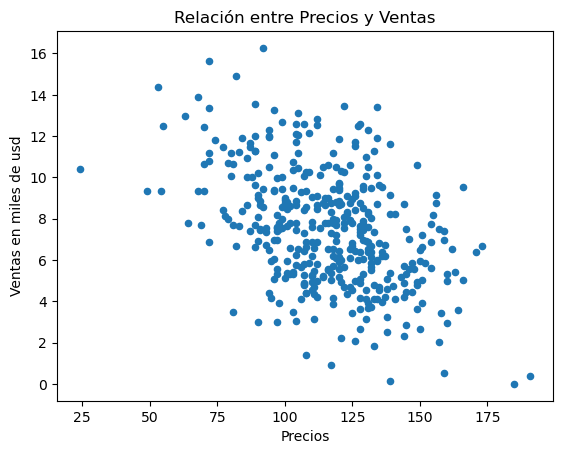

In [33]:
#Visualizamos la relación entre precios y ventas
#Para eso hacemos un Diagrama de dispersión
datos.plot(kind = 'scatter', x='Price', y='Sales')
plt.xlabel('Precios')
plt.ylabel("Ventas en miles de usd")
plt.ticklabel_format(style='plain', axis='y')
plt.title('Relación entre Precios y Ventas')
plt.show()

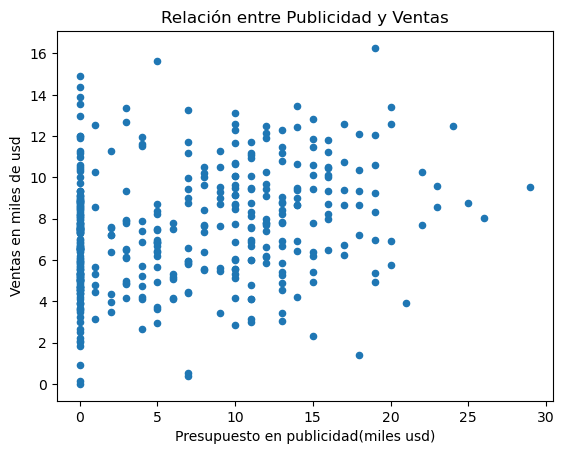

In [34]:
#Visualizamos la relación entre presupuesto en publicidad y ventas
#Para eso hacemos un Diagrama de dispersión
datos.plot(kind = 'scatter', x='Advertising', y='Sales')
plt.xlabel('Presupuesto en publicidad(miles usd)')
plt.ylabel("Ventas en miles de usd")
plt.ticklabel_format(style='plain', axis='y')
plt.title('Relación entre Publicidad y Ventas')
plt.show()

✅ Veamos otro ejemplo, pero esta vez vamos a subir la base de datos desde nuestra computadora

---

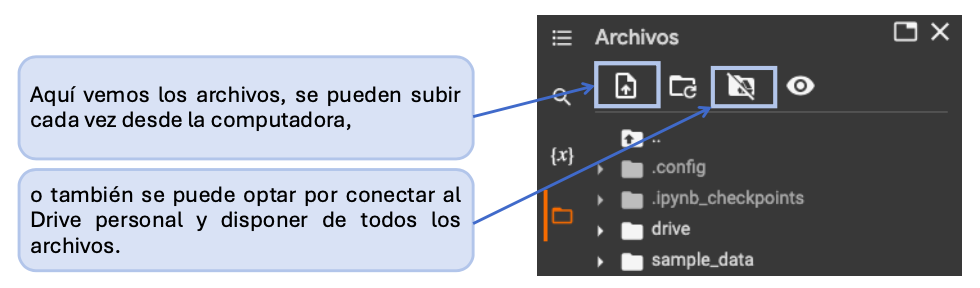

⏩ Planteo del problema


---

Una cadena de comida rápida planea agregar un nuevo artículo a su menú. Sin embargo, todavía están indecisos entre tres posibles campañas de marketing para promocionar el nuevo producto. Para determinar qué promoción tiene el mayor efecto sobre las ventas, el nuevo artículo se introduce en ubicaciones de varios mercados seleccionados al azar. Se utiliza una promoción diferente en cada ubicación y las ventas semanales del nuevo artículo se registran durante las primeras cuatro semanas.

Dataset:

MarketID: identificador único para el mercado

MarketSize: tamaño del área de mercado por ventas

LocationID: identificador único para la ubicación de la tienda

AgeOfStore: antigüedad de la tienda en años

Promoción: una de las tres promociones que se probaron

Semana: una de las cuatro semanas en las que se realizaron las promociones.

SalesInThousands: monto de ventas para un ID

✋ Objetivo:

---


En este caso es determinar cuál de las tres campañas de marketing genera las mayores ventas para el nuevo elemento del menú.



---


Como ya importamos previamente las bibliotecas necesarias, vamos a importar la base de datos desde la computadora y la visualizamos

---



In [35]:
#importamos el conjunto de datos
#lo subimos desde la pestaña superior izquierda y lo vemos
data=pd.read_csv("datos.csv",header=0)
data

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81
...,...,...,...,...,...,...,...
543,10,Large,919,2,1,4,64.34
544,10,Large,920,14,2,1,50.20
545,10,Large,920,14,2,2,45.75
546,10,Large,920,14,2,3,44.29


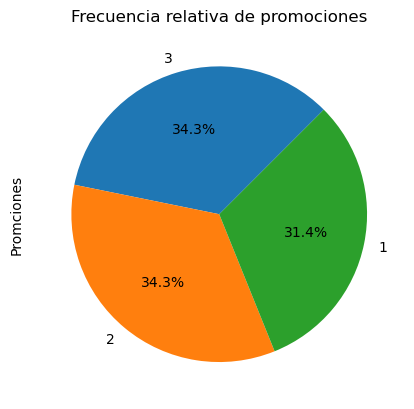

In [36]:
#Primero veamos si las 3 promociones se aplicaron de forma porcentual equilibrada
#Hacemos un gráfico de torta para ver frecuencia relativa de promociones
data["Promotion"].value_counts().plot.pie(startangle=45,autopct="%.1f%%")
plt.title("Frecuencia relativa de promociones")
plt.ylabel("Promciones")
plt.show()

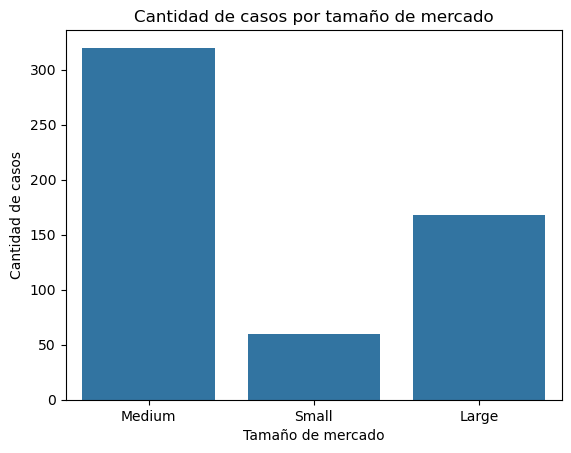

In [37]:
#Veamos la cantidad de casos por tamaño de mercado
#realizamos el gráfico con seaborn para ver tamaño  de mercado
sns.countplot(x="MarketSize",data=data)
plt.title("Cantidad de casos por tamaño de mercado")
plt.xlabel("Tamaño de mercado")
plt.ylabel("Cantidad de casos")
plt.show()

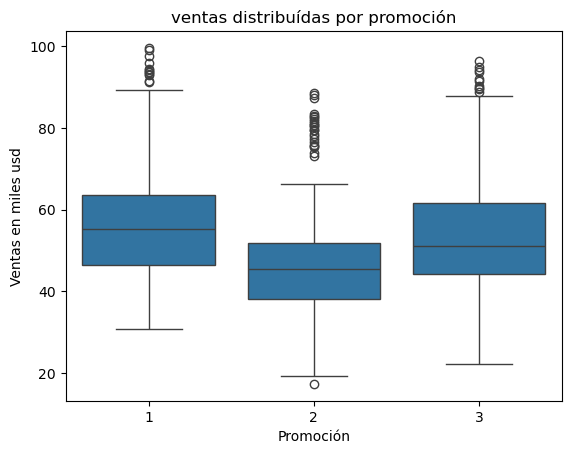

In [38]:
#Veamos la distribución de los montos de ventas segun la promoción aplicada
sns.boxplot(x="Promotion", y="SalesInThousands", data=data)
plt.title("ventas distribuídas por promoción")
plt.xlabel("Promoción")
plt.ylabel("Ventas en miles usd")
plt.show()

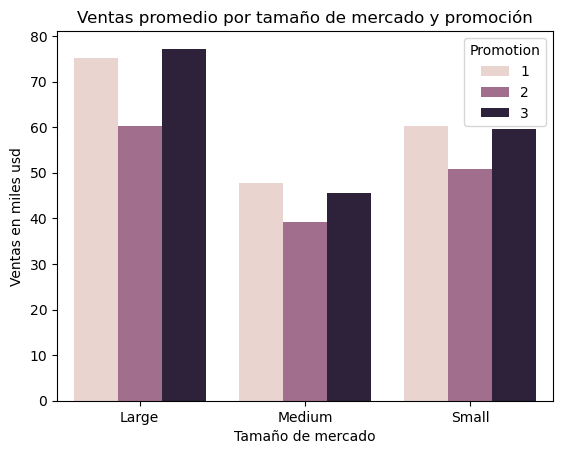

In [39]:
# Visualizamos las ventas promedio por tamaño de mercado y promoción
grupos = data.groupby(["MarketSize", "Promotion"])["SalesInThousands"].mean().reset_index()
sns.barplot(x="MarketSize", y="SalesInThousands", hue="Promotion", data=grupos)
plt.title("Ventas promedio por tamaño de mercado y promoción")
plt.xlabel("Tamaño de mercado")
plt.ylabel("Ventas en miles usd")
plt.show()

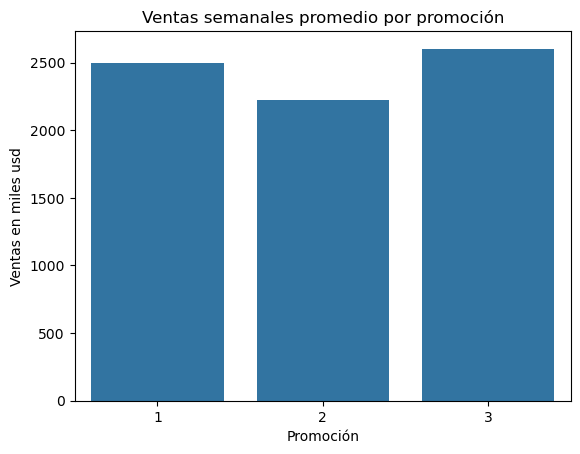

In [40]:
#vemos las ventas semanales promedio por promoción y evaluamos
ventas = data.groupby(["Promotion", "week"])["SalesInThousands"].sum().reset_index()
ventas_semanales_promedio = ventas.groupby("Promotion")["SalesInThousands"].mean().reset_index()
sns.barplot(x="Promotion", y="SalesInThousands", data=ventas_semanales_promedio)
plt.title("Ventas semanales promedio por promoción")
plt.xlabel("Promoción")
plt.ylabel("Ventas en miles usd")
plt.show()

In [41]:
print(ventas_semanales_promedio)
mejor_promocion = ventas_semanales_promedio.loc[ventas_semanales_promedio["SalesInThousands"].idxmax()]["Promotion"]
print(f"La promoción elegida es: {mejor_promocion}")

   Promotion  SalesInThousands
0          1         2498.2575
1          2         2224.4825
2          3         2602.1300
La promoción elegida es: 3.0
